# Animal Python Project

<b>By Huong Pham and Britta Madison </b>

Our group analyzed a dataset retrieved from Kaggle about the international wildlife trade from 2016 to 2017. The dataset was curated from the CITES wildlife trade database. The business problem is to answer two questions: how much trading activity occurs on animals, and of these trades which transactions were sales and purchases of live animals versus dead. 

[Wildlife Animals Trading](https://www.kaggle.com/cites/cites-wildlife-trade-database/data).

<b> Data Cleaning </b>


The dataset was available in a CSV file with 67,161 records and 18 attributes. We filtered out the transactions of plants because our business problem only focuses on animals trades. We then randomized the data in Excel, and downsized from 46,938 to 4999 trades of animals and animal products. In Excel, we replaced all missing values by “Unknown”. We also deleted three columns Family, Taxon and Order. We also created a new attribute “Label_Numerics” with four values: <b> Export Dead = 1 </b>, <b>Export Alive = 2<b/>, <b>Import Dead = 3<b/>, <b>Import Alive = 4<b/>.


The final step of data preparation is to create dummy variables for categorical attributes in Python. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns 

In [2]:
animals = pd.read_csv('Animal(7).csv')


In [3]:
#Give me the stats on my dataset
animals.describe()

,Year,Export_Or_Import,Live or Dead,Label_Numerics
count,4999.000000,4999.000000,4999.000000,4999.000000
mean,2016.003201,1.509502,1.639928,2.229646
std,0.056489,0.499960,0.480069,1.085424
min,2016.000000,1.000000,1.000000,1.000000
25%,2016.000000,1.000000,1.000000,1.000000
50%,2016.000000,2.000000,2.000000,2.000000
75%,2016.000000,2.000000,2.000000,3.000000
max,2017.000000,2.000000,2.000000,4.000000


#  Visualizations of Data

Before creating a model to predict our data, we wanted to do run some simple analysis and visualizations to gain insights on what coutries sold/bought the most animals as well as which animal was traded the most and why.

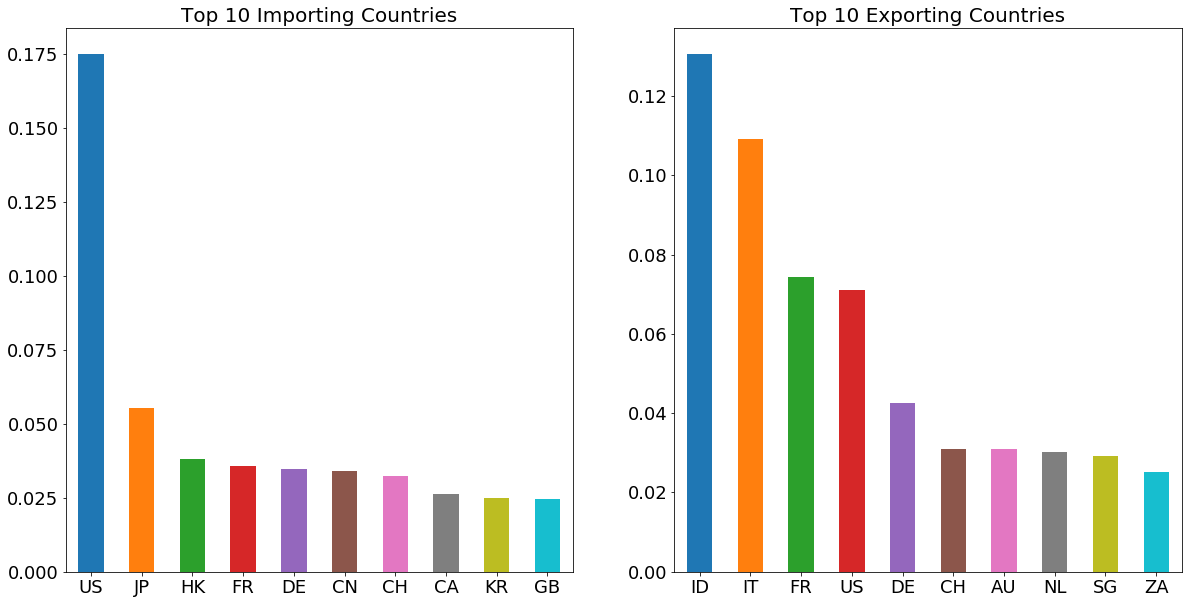

In [4]:
plt.figure(figsize=(20,10))

plt.subplot(121)
toptrader_imp = animals.Importer.value_counts(normalize=True)
toptrader_imp.head(10).plot(kind='bar', fontsize=18)
plt.title('Top 10 Importing Countries', fontsize=20)
plt.xticks(rotation=0)

plt.subplot(122)
toptrader_imp = animals.Exporter.value_counts(normalize=True)
toptrader_imp.head(10).plot(kind='bar', fontsize=18)
plt.title('Top 10 Exporting Countries', fontsize=20)
plt.xticks(rotation=0)

plt.show()

To gain some insight into which countries were leading in sales and purchases, we split the data into two categories, imports and exports. Then we graphed the data by each categories. These graphs are shown above. On the graph on the left, one can see US dominates in importing or purchasing animals from other others. Next is Japan (JP) and Hong Kong (HK).

On the graph to the right, we can see that Indonesia (ID) is leading in exporting or sale transactions of animals to other countries with Italy (IT), and France (FR) following behind. 



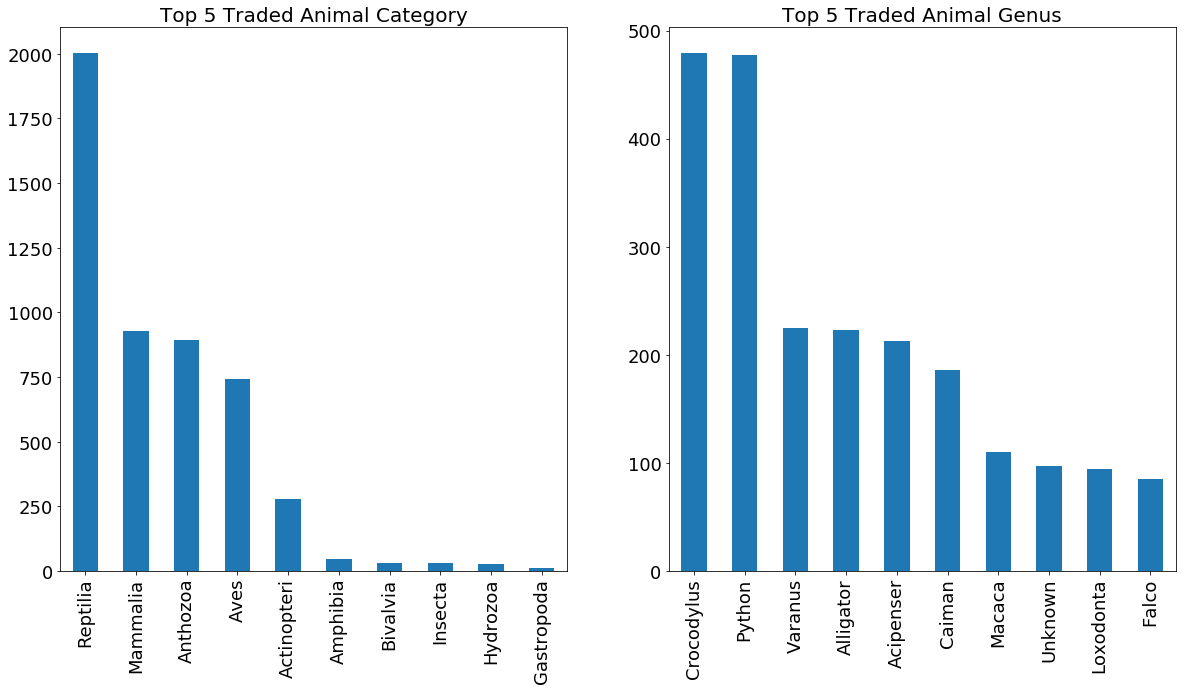

In [3]:
plt.figure(figsize=(20,10))

plt.subplot(121)
graph= animals.Category.value_counts().head(10).plot(kind='bar', fontsize=18)
plt.title('Top 5 Traded Animal Category', fontsize=20)


plt.subplot(122)
graph= animals.Genus.value_counts().head(10).plot(kind='bar', fontsize=18)
plt.title('Top 5 Traded Animal Genus', fontsize=20)

plt.show()

On the graph on the left, one can see that Reptilia or Reptiles are the most traded animals with 2000 of the transactions in our dataset. Within that category of animals. 

The next question we want to ask is what animal within the Reptile family is being traded the most. To answer this question, we created the graph on the right which tells us the Crocodylus or Crocodiles and Pthons (Snakes) are the top traded animals with a 500 transaction each. Varanus (Lizards) and Alligators was tied in second with 250 transactions while Acipenser (Sturgeon) are last.

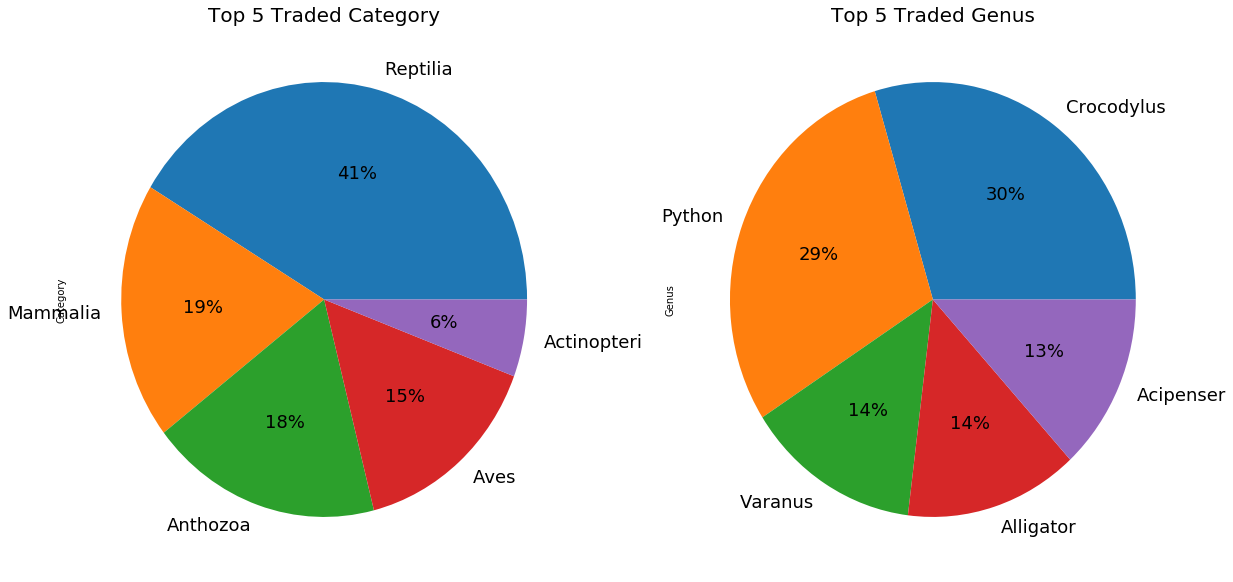

In [6]:
plt.figure(figsize=(20,10))

plt.subplot(121)
graph= animals.Category.value_counts().head(5).plot(kind='pie', fontsize=18, autopct='%1.0f%%')
plt.title('Top 5 Traded Category', fontsize=20)


plt.subplot(122)
graph= animals.Genus.value_counts().head(5).plot(kind='pie', fontsize=18, autopct='%1.0f%%')
plt.title('Top 5 Traded Genus', fontsize=20)

plt.show()

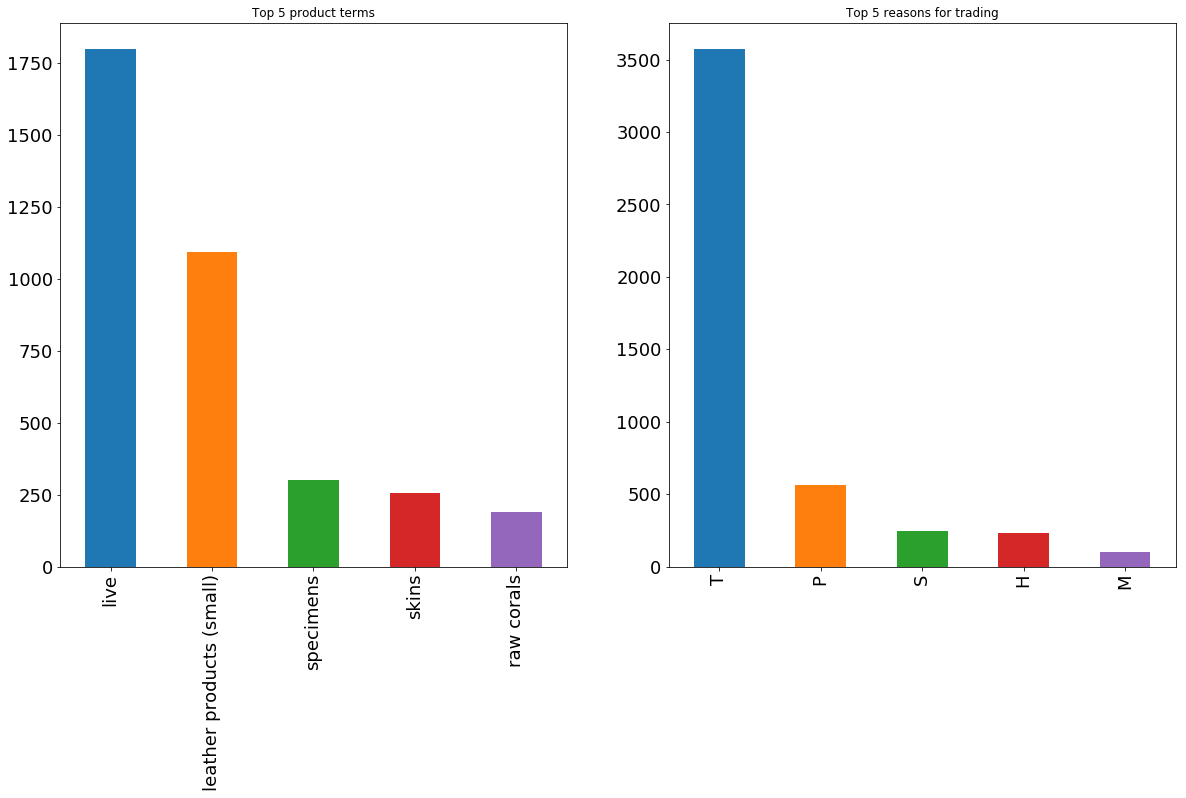

In [7]:
plt.figure(figsize=(20,10))

plt.subplot(121)
graph= animals.Term.value_counts().head(5).plot(title='Top 5 product terms', kind='bar', fontsize=18)


plt.subplot(122)
graph= animals.Purpose.value_counts().head(5).plot(title='Top 5 reasons for trading', kind='bar', fontsize=18)

plt.show()

On the graph on the left, one can see that most of the animals sold or purchased are alive or leather products (this align with our observations of the most traded animals was crocodiles and snakes).  The graph on the right drives into the reason or purpose for the trade. In most cases, we are seeing the trade is for commerical reasons. Note commerical is a vague term that could mean clothing, pets, research, etc. Commerical means buying or selling, in commerce, animals for profit.

Commerical was followed by Personal(P), Scientific (S), Hunting Trophy (H), and last was Medical (M). 

# Create label vector and predictors


In [8]:
#create the outcome/lable vector (y)

y=animals.Label_Numerics

print(y.shape)
print (y.head())

(4999L,)
0    1
1    3
2    1
3    3
4    4
Name: Label_Numerics, dtype: int64


In [9]:
#Creating X which is the selected attributes as dummy data because jupyter get read nominal attributes

feature_cols = ['App.','Genus', 'Term', 'Purpose', 'Live or Dead', 'Importer','Exporter']
feat = animals[feature_cols]

animals = pd.get_dummies(feat)
X=animals
print(X.shape)

print X

(4999, 837)
      Live or Dead  App._I  App._II  App._III  App._N  Genus_Acanthastrea  \
0                2       0        1         0       0                   0   
1                1       1        0         0       0                   0   
2                2       0        1         0       0                   0   
3                1       0        1         0       0                   0   
4                1       0        1         0       0                   0   
5                1       1        0         0       0                   0   
6                2       0        1         0       0                   0   
7                2       0        1         0       0                   0   
8                2       0        1         0       0                   0   
9                2       0        1         0       0                   0   
10               2       0        1         0       0                   0   
11               2       0        1         0       0           

# Opitmal K

In [10]:
#these are the modules we will use for cross-validation and KNN, let's import them now 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Now, let's iterate through potential values of K to find an optimal value for our KNN model
k_range = range(1,20)

models = []

for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k)
    k_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    models.append(k_scores.mean())
print(models)

[0.7805513746991386, 0.7705408672448303, 0.8049500114959132, 0.800748751451781, 0.8123412866137423, 0.807551260263122, 0.8169521723543621, 0.814558117187012, 0.8185265735446852, 0.8163441529780135, 0.8181581555875497, 0.8115505050029608, 0.8149433161261662, 0.8149461138237198, 0.8143537258543985, 0.8133509218623829, 0.8141496986858682, 0.8149449161901673, 0.8133376953226529]


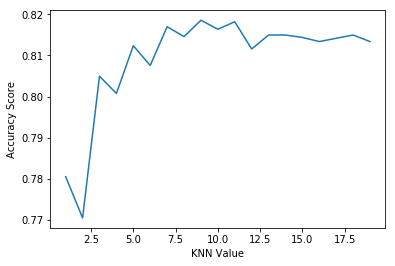

In [11]:
#let's plot the values to see more quickly what the best value is
plt.plot(k_range, models)
plt.xlabel('KNN Value')
plt.ylabel('Accuracy Score')

plt.show()

Based on the graph above, we decided to use 10 as our Knn value due to that number having the highest accuracy score.

# Train_split_test, Knn

In [15]:
#Define test_train data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# before splitting
print X.shape

# after splitting
print X_train.shape
print X_test.shape

(4999, 837)
(3749, 837)
(1250, 837)


# KNN Model

In [16]:
#Train the model on the training dataset, using k = 10

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [17]:
#Evaluate the Model KNN
from sklearn import metrics
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.8136


# Decision Tree Model

In [18]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [20]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
y_pred = classifier.predict(X_test)

print y_pred

print metrics.accuracy_score(y_test, y_pred)

[1 1 1 1 1 1 1 3 2 1 2 2 3 2 2 2 2 2 3 3 1 3 1 2 3 2 1 1 2 2 4 1 2 1 3 2 2
 4 1 4 3 1 1 4 4 3 2 4 2 4 1 1 2 2 1 4 4 2 1 2 3 4 2 3 1 4 2 3 1 4 3 1 4 2
 2 1 3 4 3 3 2 1 1 2 2 3 1 1 2 1 2 1 3 1 1 4 3 2 2 4 2 2 2 3 1 2 4 3 2 1 1
 3 2 1 1 2 2 2 4 2 2 1 2 2 4 1 4 2 1 1 1 4 2 4 2 2 3 2 1 1 3 2 1 4 1 1 1 1
 1 2 3 3 1 1 1 2 1 3 4 3 2 2 2 4 4 3 1 1 4 3 2 2 1 2 2 1 2 3 2 1 2 2 4 2 3
 2 1 1 2 4 4 1 2 2 1 1 2 1 1 3 3 4 1 1 1 2 4 2 1 3 3 2 1 4 4 1 1 1 4 4 1 4
 1 4 4 2 2 2 2 4 1 1 2 4 3 2 4 1 4 4 4 1 1 4 4 1 1 3 2 3 3 1 2 4 1 4 3 1 3
 3 2 2 2 4 1 2 2 1 1 2 4 1 2 2 1 3 2 2 3 3 3 2 1 2 1 1 2 1 4 2 2 1 3 3 2 2
 1 3 2 1 1 4 4 4 2 1 2 1 2 2 1 2 2 2 1 4 1 1 2 2 1 3 1 1 1 1 1 2 1 1 1 4 2
 1 2 1 4 1 1 4 1 3 1 4 1 2 4 4 1 3 4 4 4 1 1 4 2 2 2 1 2 1 1 4 4 1 4 1 1 2
 3 1 3 1 1 3 1 1 1 2 1 2 1 3 1 2 2 2 3 3 1 4 2 1 4 1 2 1 4 2 1 2 4 1 1 2 4
 1 4 2 4 2 1 4 3 4 4 4 4 1 3 1 1 3 2 1 1 1 2 1 1 1 1 1 1 2 1 4 1 1 1 1 1 4
 3 2 4 4 2 4 1 1 1 2 2 4 4 1 2 2 2 2 3 2 2 1 1 1 2 2 4 3 2 2 4 4 2 1 2 2 2
 4 2 3 2 4 2 1 2 2 2 1 4 

# Use confusion matrix to evaluate Decision Tree model

In [22]:
# print confusion matrix
print metrics.confusion_matrix(y_test, y_pred)

[[281  48   0   0]
 [ 54 264   0   0]
 [  0   0 134  25]
 [  0   0  19 175]]


In [23]:
# save confusion matrix and slice into four pieces
dt_confusion = metrics.confusion_matrix(y_test, y_pred)
dt_TP = dt_confusion[1][1]
dt_TN = dt_confusion[0][0]
dt_FP = dt_confusion[0][1]
dt_FN = dt_confusion[1][0]

print 'True Positives:', dt_TP
print 'True Negatives:',dt_TN
print 'False Positives:',dt_FP
print 'False Negatives:',dt_FN

True Positives: 264
True Negatives: 281
False Positives: 48
False Negatives: 54


In [24]:
# calculate the sensitivity (or recall)
print dt_TP / float(dt_TP + dt_FN)

#calculate the specificity
print dt_TN / float(dt_TN + dt_FP)

0.8301886792452831
0.8541033434650456


# Random Forest Model

In [25]:
#Import Random Forest Classifier 
#Randon State is so the random selection is the same when the cards are shuffled the cards are shuffled the same

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True,random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [26]:
#Evaluate Random Forest

from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print predicted
print accuracy

[1 1 1 1 1 1 1 3 2 1 2 2 3 2 2 2 2 2 3 3 2 3 1 2 3 2 1 1 2 2 4 1 2 1 3 2 2
 4 1 4 3 1 2 4 4 3 2 3 2 4 1 1 2 2 1 4 4 1 1 2 3 4 2 3 1 4 2 3 1 4 3 2 4 2
 2 1 3 4 3 3 2 1 1 2 2 3 1 1 2 1 2 1 3 1 1 4 3 2 2 4 2 2 2 3 1 2 4 3 2 1 2
 3 2 1 1 2 2 2 4 2 2 1 2 1 4 1 4 1 1 1 1 4 2 4 2 2 3 2 1 1 3 2 1 4 1 1 1 1
 1 2 4 3 1 1 1 2 1 3 4 3 2 2 2 4 4 3 1 1 4 3 2 2 1 2 1 1 2 3 2 1 2 2 4 2 4
 2 1 1 2 4 4 1 2 2 1 1 2 2 1 3 3 4 1 1 1 2 4 2 1 3 3 2 1 4 3 1 2 1 4 4 1 3
 1 4 4 1 2 1 2 3 1 1 2 4 3 2 4 1 4 4 4 1 1 4 4 2 1 3 1 3 3 1 2 4 2 4 3 1 3
 3 2 2 2 4 1 2 2 1 1 2 4 1 2 2 2 3 2 2 3 3 3 2 1 2 1 1 2 2 4 2 2 1 3 3 2 2
 1 4 2 1 1 4 4 4 2 1 2 1 2 1 1 2 2 2 2 4 1 1 2 2 1 3 2 1 2 1 1 2 1 2 1 4 2
 1 2 1 4 1 1 4 1 3 1 4 1 2 4 4 1 3 4 4 4 1 1 4 2 2 1 1 2 1 1 4 4 1 4 1 1 2
 3 1 3 1 2 3 1 1 1 2 1 2 1 3 1 2 2 2 4 3 1 3 2 1 4 1 2 1 4 2 2 2 4 2 1 1 4
 1 4 2 4 2 1 4 3 4 4 3 4 1 3 1 1 3 2 1 1 1 2 1 1 1 1 1 1 1 1 4 2 1 1 1 1 4
 4 2 4 4 2 4 1 1 1 2 2 4 4 1 2 1 2 2 3 2 2 1 1 2 2 2 4 3 2 2 4 4 2 1 2 2 2
 4 2 3 1 4 2 1 2 2 2 1 4 

# Cross-validation model

In [29]:
#Create Cross Validation
from sklearn.model_selection import KFold #import correct modules

In [30]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt


knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, X, y, cv=7, scoring='accuracy') #cv is the cross-validation parameter
print(scores)

[0.81424581 0.83496503 0.83893557 0.79971989 0.81372549 0.81626928
 0.82328191]


In [31]:
print scores.mean()

0.8201632842211021


# Evaluate each model using Confusion Matrix

In [32]:
#Reload the Knn model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [33]:
#Evaluate the Model KNN
from sklearn import metrics
y_pred_class = knn.predict(X_test)

print metrics.accuracy_score(y_test, y_pred_class)

0.798


In [34]:
# save confusion matrix and slice into four pieces KNN Model
knn_confusion = metrics.confusion_matrix(y_test, y_pred_class)
knn_TP = knn_confusion[1][1]
knn_TN = knn_confusion[0][0]
knn_FP = knn_confusion[0][1]
knn_FN = knn_confusion[1][0]

print 'True Positives:', knn_TP
print 'True Negatives:', knn_TN
print 'False Positives:', knn_FP
print 'False Negatives:', knn_FN

True Positives: 250
True Negatives: 259
False Positives: 68
False Negatives: 68


In [35]:
# calculate the sensitivity - the ability to correctly identify the true positives for KNN
print knn_TP / float(knn_TP + knn_FN)

# calculate the specificity - the ability to correctly identify the true negatives for KNN
print knn_TN / float(knn_TN + knn_FP)

0.7861635220125787
0.7920489296636085


In [36]:
# create and print confusion matrix for the Random Forest
print metrics.confusion_matrix(y_test, predicted)

[[280  49   0   0]
 [ 41 277   0   0]
 [  0   0 137  22]
 [  0   0  15 179]]


In [37]:
# save confusion matrix and slice into four pieces Random Forest
rf_confusion = metrics.confusion_matrix(y_test, predicted)
rf_TP = rf_confusion[1][1]
rf_TN = rf_confusion[0][0]
rf_FP = rf_confusion[0][1]
rf_FN = rf_confusion[1][0]

print 'True Positives:', rf_TP
print 'True Negatives:', rf_TN
print 'False Positives:', rf_FP
print 'False Negatives:', rf_FN

True Positives: 277
True Negatives: 280
False Positives: 49
False Negatives: 41


In [38]:
# calculate the sensitivity - the ability to correctly identify the true positives for Random Forest
print knn_TP / float(rf_TP + rf_FN)

# calculate the specificity - the ability to correctly identify the true negatives for Random Froest
print knn_TN / float(rf_TN + rf_FP)

0.7861635220125787
0.7872340425531915


# Logistic Regression Model

In [39]:
#Fit data on Logistic regression model
#calculate the degree of correlation between the variables to predict the label 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('App.', 10.85307218777017),
 ('Genus', -5.079110943194928),
 ('Term', -4.496088209858538),
 ('Purpose', 9.516493241106751),
 ('Live or Dead', -9.176592380924463),
 ('Importer', -0.4631376679832184),
 ('Exporter', -0.01765660092847137)]

In [40]:
#predicted probabilities
l_pred_class = logreg.predict(X_test)

In [41]:
# calculate classification accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, l_pred_class)

0.837


In [42]:
# print confusion matrix for Logistic Regression
print metrics.confusion_matrix(y_test, l_pred_class)

[[263  66   0   0]
 [ 41 277   0   0]
 [  0   0 134  25]
 [  0   0  31 163]]


In [43]:
# save confusion matrix and slice into four pieces
log_confusion = metrics.confusion_matrix(y_test, y_pred_class)
log_TP = log_confusion[1][1]
log_TN = log_confusion[0][0]
log_FP = log_confusion[0][1]
log_FN = log_confusion[1][0]   

print 'True Positives:', log_TP
print 'True Negatives:', log_TN
print 'False Positives:', log_FP
print 'False Negatives:', log_FN

True Positives: 250
True Negatives: 259
False Positives: 68
False Negatives: 68


In [44]:
# calculate the sensitivity (or recall)
print log_TP / float(log_TP + log_FN)

#calculate the specificity
print log_TN / float(log_TN + log_FP)

0.7861635220125787
0.7920489296636085


In [45]:
# store the predicted probabilities for the Log. Reg
l_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Plot Confusion Matrix for Randon Forest

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          class_names = y_labels_vals,        # list of names of the classes
                          title        = best_estimator_name) # title of graph


In [46]:
#print confusion matrix for the Random Forest
rf_cm_metric = metrics.confusion_matrix(y_test, predicted)
print rf_cm_metric

[[280  49   0   0]
 [ 41 277   0   0]
 [  0   0 137  22]
 [  0   0  15 179]]


[[280  49   0   0]
 [ 41 277   0   0]
 [  0   0 137  22]
 [  0   0  15 179]]


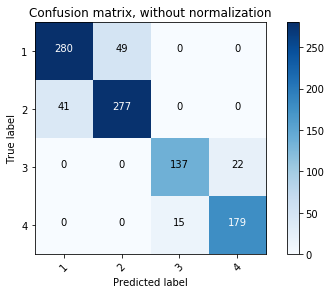

In [47]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#import dataset
animals = pd.read_csv('Animal(7).csv')


#defining the types of classes
class_names = ['1', '2', '3', '4']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix using the Random Forest confusion matrix from before
cnf_matrix = rf_cm_metric
np.set_printoptions(precision=2)

# Plot non-normalized raw data confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()

Looking at the different models we tested, the specificity or sensitivity for each ranged from .75 to .79. Therefore, to choose the mest model, we made our decision based on the accuracy rating. 

We chose to display the Confusion Matrix for the Random Forest because the accuracy rate was .873, which was the highest of the models we tested. Looking at the results, there is a even split in the model ability to differentiate the true positive and negavtives in each category. 1 and 2 is one sub confusion matrix that is looking at all the dead animal transactions. While 3 and 4 is another sub confusion matrix looking at live animals transactions. 

This is due to the sub categories within the data and label. To create our label, we had to first identify export transactions from import transaction. Once we made this differentiation, we then broke the transaction down further to if the animal in the sell/purchase was dead or alive.


<b> Application of the model <b/>


The results of this project can be helpful for the CITES organization to gain insights about the international wildlife trade. CITES can potentially use the algorithms to monitor the online trading activities on the Web-based marketplaces. If CITES combine the prediction if the animals traded dead or alive with the information if the animals are endangered species, CITES can determine if the traders will more likely to violate the law and trade an endangered species in a dead condition. 

